## Sales ForeCasting Using Python


### Libraries installation 

In [11]:
!pip install requests pandas openpyxl bs4


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Collection

### Scraping Amazon Mobile Phone Data
#### This script scrapes product details (name, price, rating, reviews, and links) for mobile phones from Amazon and saves the data to an Excel file for further analysis.

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from datetime import datetime

# Setup headers and base URL
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.5",
}
base_url = "https://www.amazon.com/s?k=mobile+phones&page=" 

# Prepare lists to store product data
product_names = []
product_prices = []
product_ratings = []
product_reviews = []
product_links = []
product_sales_last_month = []
scrape_dates = []
current_date = datetime.now().strftime("%Y-%m-%d")

# Loop through pages 1 to 20
for page_num in range(1, 21):
    url = f"{base_url}{page_num}"

    # Send request to the page
    response = requests.get(url, headers=headers)

    # Check for successful request
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        
        # Find all product listings
        products = soup.find_all("div", {"data-component-type": "s-search-result"})

        # Verify if products were found; if not, Amazon may be blocking requests
        if not products:
            print(f"No products found on page {page_num}. Amazon may be blocking requests.")
            continue  # Skip this page if no products found

        # Extract data for each product
        for product in products:
            # Product name
            try:
                name = product.h2.text.strip()
            except AttributeError:
                name = "Name not available"

            # Product price
            try:
                price_whole = product.find("span", "a-price-whole").text
                price_fraction = product.find("span", "a-price-fraction").text
                price = f"{price_whole}.{price_fraction}"
            except AttributeError:
                price = "Price not listed"

            # Product rating
            try:
                rating = product.find("span", class_="a-icon-alt").text
            except AttributeError:
                rating = "No rating"

            # Number of reviews
            try:
                reviews = product.find("span", {"class": "a-size-base"}).text
            except AttributeError:
                reviews = "No reviews"

            # Product link
            try:
                link = product.h2.a["href"] if product.h2 and product.h2.a else None
                full_link = f"https://www.amazon.com{link}" if link else "No link available"
            except AttributeError:
                full_link = "No link available"

            # Number bought in past month
            try:
                sales_last_month = product.find(text=lambda x: "bought in past month" in x).strip()
            except AttributeError:
                sales_last_month = "No data available"

            # Append extracted data to respective lists
            product_names.append(name)
            product_prices.append(price)
            product_ratings.append(rating)
            product_reviews.append(reviews)
            product_links.append(full_link)
            product_sales_last_month.append(sales_last_month)
            scrape_dates.append(current_date)
        print(f"Page {page_num} retrieved successfully with {len(products)} products.")
    else:
        print(f"Failed to retrieve page {page_num}. Status code: {response.status_code}")

    # Random delay to reduce bot detection
    time.sleep(random.uniform(3, 7))  # Random delay between 3 and 7 seconds

# Create a DataFrame and save to Excel with openpyxl engine
df = pd.DataFrame({
    "Date": scrape_dates,
    "Product Name": product_names,
    "Price": product_prices,
    "Rating": product_ratings,
    "Number of Reviews": product_reviews,
    "Product Link": product_links,
    "Bought in Past Month": product_sales_last_month
})

# Save to Excel file
df.to_excel("amazon_mobile_phones_December1.xlsx", index=False, engine='openpyxl')
print("Data has been saved to amazon_mobile_phones_December1.xlsx")


C:\Users\Appa\AppData\Local\Temp\ipykernel_14524\18802776.py:81: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  sales_last_month = product.find(text=lambda x: "bought in past month" in x).strip()


Page 1 retrieved successfully with 21 products.
Page 2 retrieved successfully with 22 products.
Page 3 retrieved successfully with 22 products.
Page 4 retrieved successfully with 22 products.
Page 5 retrieved successfully with 22 products.
Page 6 retrieved successfully with 22 products.
Page 7 retrieved successfully with 22 products.
Page 8 retrieved successfully with 22 products.
Page 9 retrieved successfully with 22 products.
Page 10 retrieved successfully with 22 products.
Page 11 retrieved successfully with 22 products.
Page 12 retrieved successfully with 22 products.
Page 13 retrieved successfully with 22 products.
Page 14 retrieved successfully with 22 products.
Page 15 retrieved successfully with 22 products.
Page 16 retrieved successfully with 22 products.
Page 17 retrieved successfully with 22 products.
Page 18 retrieved successfully with 22 products.
Page 19 retrieved successfully with 22 products.
Page 20 retrieved successfully with 8 products.
Data has been saved to amazon_

In [8]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("amazon_mobile_phones_December1.xlsx", engine='openpyxl')

# Display the DataFrame in the notebook
display(df)

,Date,Product Name,Price,Rating,Number of Reviews,Product Link,Bought in Past Month
0,2025-01-04,Moto G 5G | 2024 | Unlocked | Made for US 4/12...,149..99,4.1 out of 5 stars,"1,284",No link available,5K+ bought in past month
1,2025-01-04,"Samsung Galaxy A15 (SM-155M/DSN), 128GB 6GB RA...",168..00,4.2 out of 5 stars,"1,338",No link available,5K+ bought in past month
2,2025-01-04,Moto G Play | 2024 | Unlocked | Made for US 4/...,109..99,4.0 out of 5 stars,"1,721",No link available,4K+ bought in past month
3,2025-01-04,Samsung Galaxy A15 A155M 128GB Dual-SIM GSM Un...,149..99,4.3 out of 5 stars,800,No link available,4K+ bought in past month
4,2025-01-04,S24 Ultra Unlocked Phone 8GB+256GB Android Cel...,169..99,3.5 out of 5 stars,9,No link available,50+ bought in past month
...,...,...,...,...,...,...,...
420,2025-01-04,"I16 PROMAX 5G Cell Phone,Smartphone Unlocked C...",179..99,No rating,No reviews,No link available,No data available
421,2025-01-04,"UMIDIGI Unlocked Cell Phone, Bison X20 Android...",179..99,3.9 out of 5 stars,32,No link available,No data available
422,2025-01-04,"NUU A15 Cell Phone 4GB + 128GB, Compatible wit...",119..99,4.1 out of 5 stars,276,No link available,200+ bought in past month
423,2025-01-04,$19/mo. Ultra Mobile Prepaid Phone Plan with U...,15..00,3.7 out of 5 stars,"1,341",No link available,500+ bought in past month


## Data Preprocessing

### Transforming Amazon Mobile Phone Data
#### This script processes and cleans the scraped Amazon mobile phone data, extracting detailed product information (e.g., storage, color, camera megapixels) and converting price, ratings, and reviews into standardized formats. The transformed data is saved as a CSV file for further analysis.

In [13]:
import pandas as pd
import re
import numpy as np

# Load the dataset
df = pd.read_excel("amazon_mobile_phones_October.xlsx")

# Verify column names
print("Columns in dataset:", df.columns)

# Define a function to extract details from the 'Product Name' column
def extract_details(row):
    if not isinstance(row, str):  # Handle NaN or non-string values
        return {
            "Product Name": "Unknown",
            "Sim Type": "Unknown",
            "Color": "Unknown",
            "Camera Megapixel": "Unknown",
            "Storage": "Unknown",
            "Charging Type": "Unknown"
        }
    product_name = row.split(",")[0]  # Assume the name is the first part before the first comma
    sim_type = "Dual SIM" if "Dual SIM" in row or "Dual-SIM" in row else "Single SIM"
    color_match = re.search(r"(Light Blue|Blue Black|Black|Obsidian|Awesome Lilac|Ink Blue|Caramel Latte|Navy Blue|Mint|Violet|Urban Grey)", row, re.IGNORECASE)
    color = color_match.group(0) if color_match else "Unknown"
    camera_match = re.search(r"(\d{1,4}MP)", row)
    camera_megapixel = camera_match.group(0) if camera_match else "Unknown"
    storage_match = re.search(r"(\d{2,4}GB)", row)
    storage = storage_match.group(0) if storage_match else "Unknown"
    charging = "Super Fast Charging" if "Super Fast Charging" in row else "Standard Charging"
    return {
        "Product Name": product_name.strip(),
        "Sim Type": sim_type,
        "Color": color.strip(),
        "Camera Megapixel": camera_megapixel.strip(),
        "Storage": storage.strip(),
        "Charging Type": charging
    }

# Apply the function to transform the 'Product Name' column
details = df["Product Name"].apply(extract_details)
transformed_data = pd.DataFrame(details.tolist())

# Define required columns and merge them with extracted details
columns_to_keep = ['Price', 'Rating', 'Number of Reviews', 'Bought in Past Month']
if all(col in df.columns for col in columns_to_keep):
    merged_df = pd.concat([transformed_data, df[columns_to_keep]], axis=1)
else:
    raise ValueError("Some columns in 'columns_to_keep' are missing in the dataset.")

# Function to clean and convert "3K+ bought in past month" to numeric values
def clean_bought_in_past_month(value):
    if isinstance(value, str):  # Ensure it's a string before processing
        value = value.replace("bought in past month", "").strip()  # Remove extra text
        match = re.match(r"(\d+)([KMB]?)\+?", value)  # Match numeric part and shorthand
        if match:
            number, shorthand = match.groups()
            multiplier = {"K": 1_000, "M": 1_000_000, "B": 1_000_000_000}.get(shorthand, 1)
            return int(number) * multiplier
    return None  # Return None for unexpected formats or NaN values

# Apply the cleaning function to the "Bought in Past Month" column
if "Bought in Past Month" in merged_df.columns:
    merged_df["Bought in Past Month"] = (
        merged_df["Bought in Past Month"]
        .astype(str)  # Ensure all values are strings
        .apply(clean_bought_in_past_month)
    )


# Replace empty cells with NaN
merged_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Rename 'Storage' column to 'Storage in GB' and clean values
if 'Storage' in merged_df.columns:
    merged_df.rename(columns={'Storage': 'Storage in GB'}, inplace=True)
    merged_df['Storage in GB'] = merged_df['Storage in GB'].str.replace('GB', '', regex=False).str.strip()

if 'Price' in merged_df.columns:
    # Replace "Price not Listed" with NaN
    merged_df['Price'] = merged_df['Price'].replace('Price not Listed', np.nan)
    # Remove extra dots or commas and extract numeric part
    merged_df['Price'] = merged_df['Price'].astype(str).str.replace(r'[,.]+', '', regex=True).str.extract(r'(\d+)')[0]
    # Convert to numeric type and divide by 100 to adjust the format
    merged_df['Price'] = pd.to_numeric(merged_df['Price'], errors='coerce') / 100
    # Round to the nearest whole number and convert to integer type
    merged_df['Price'] = merged_df['Price'].round(0).astype('Int64', errors='ignore')
    # Rename the column
    merged_df.rename(columns={'Price': 'Price in Dollar'}, inplace=True)


# Clean and update the 'Number of Reviews' column
if 'Number of Reviews' in merged_df.columns:
    # Remove non-numeric characters and keep only numbers
    merged_df['Number of Reviews'] = merged_df['Number of Reviews'].astype(str).str.extract(r'(\d+)')[0]
    # Convert to numeric type
    merged_df['Number of Reviews'] = pd.to_numeric(merged_df['Number of Reviews'], errors='coerce')


# Clean and update the 'Rating' column
if 'Rating' in merged_df.columns:
    merged_df['Rating'] = merged_df['Rating'].str.extract(r'(\d\.\d)').astype(float)

# Rename and clean 'Camera Megapixel' column
if 'Camera Megapixel' in merged_df.columns:
    merged_df.rename(columns={'Camera Megapixel': 'Camera Megapixel in MP'}, inplace=True)
    merged_df['Camera Megapixel in MP'] = merged_df['Camera Megapixel in MP'].str.replace('MP', '', regex=False).str.strip()

# Replace 'Unknown' values with NaN
merged_df.replace(['Unknown','<NA>'], np.nan, inplace=True)
merged_df.insert(0, 'Date', '2024-10-01')

# Save the transformed DataFrame to a new file
merged_df.to_csv('transformed_file_mobile_phone_october.csv', index=False)

# Display the transformed DataFrame
merged_df


Columns in dataset: Index(['Date', 'Product Name', 'Price', 'Rating', 'Number of Reviews',
       'Product Link', 'Bought in Past Month'],
      dtype='object')


,Date,Product Name,Sim Type,Color,Camera Megapixel in MP,Storage in GB,Charging Type,Price in Dollar,Rating,Number of Reviews,Bought in Past Month
0,2024-10-01,SAMSUNG Galaxy Z Fold 6 AI Cell Phone,Single SIM,NaN,NaN,512,Standard Charging,1648,4.3,208.0,300.0
1,2024-10-01,Moto G 5G | 2024 | Unlocked | Made for US 4/12...,Single SIM,NaN,50,128,Standard Charging,150,4.1,1.0,5000.0
2,2024-10-01,Samsung Galaxy A15 (SM-155M/DSN),Dual SIM,Light Blue,NaN,128,Standard Charging,165,4.2,1.0,6000.0
3,2024-10-01,S24 Ultra Unlocked Phone 8GB+256GB Android Cel...,Dual SIM,Black,108,256,Standard Charging,170,5.0,9.0,NaN
4,2024-10-01,Samsung Galaxy A15 A155M 128GB Dual-SIM GSM Un...,Dual SIM,Blue Black,NaN,128,Standard Charging,150,4.3,NaN,4000.0
...,...,...,...,...,...,...,...,...,...,...,...
411,2024-10-01,C24 Ultra 5G Unlocked Phones,Dual SIM,NaN,48,256,Standard Charging,180,5.0,6.0,NaN
412,2024-10-01,SAMSUNG Galaxy S24 Ultra Cell Phone,Single SIM,NaN,50,256,Standard Charging,1300,4.5,3.0,200.0
413,2024-10-01,SAMSUNG Galaxy Z Flip 6 AI Cell Phone,Single SIM,NaN,NaN,256,Standard Charging,1100,3.8,272.0,50.0
414,2024-10-01,Folding Adjustable Cell Phone Stand - Made fro...,Single SIM,NaN,NaN,NaN,Standard Charging,14,4.7,87.0,100.0


In [14]:
import pandas as pd
import re
import numpy as np

# Load the dataset
df = pd.read_excel("amazon_mobile_phones_20_pages.xlsx")

# Verify column names
print("Columns in dataset:", df.columns)

# Define a function to extract details from the 'Product Name' column
def extract_details(row):
    if not isinstance(row, str):  # Handle NaN or non-string values
        return {
            "Product Name": "Unknown",
            "Sim Type": "Unknown",
            "Color": "Unknown",
            "Camera Megapixel": "Unknown",
            "Storage": "Unknown",
            "Charging Type": "Unknown"
        }
    product_name = row.split(",")[0]  # Assume the name is the first part before the first comma
    sim_type = "Dual SIM" if "Dual SIM" in row or "Dual-SIM" in row else "Single SIM"
    color_match = re.search(r"(Light Blue|Blue Black|Black|Obsidian|Awesome Lilac|Ink Blue|Caramel Latte|Navy Blue|Mint|Violet|Urban Grey)", row, re.IGNORECASE)
    color = color_match.group(0) if color_match else "Unknown"
    camera_match = re.search(r"(\d{1,4}MP)", row)
    camera_megapixel = camera_match.group(0) if camera_match else "Unknown"
    storage_match = re.search(r"(\d{2,4}GB)", row)
    storage = storage_match.group(0) if storage_match else "Unknown"
    charging = "Super Fast Charging" if "Super Fast Charging" in row else "Standard Charging"
    return {
        "Product Name": product_name.strip(),
        "Sim Type": sim_type,
        "Color": color.strip(),
        "Camera Megapixel": camera_megapixel.strip(),
        "Storage": storage.strip(),
        "Charging Type": charging
    }

# Apply the function to transform the 'Product Name' column
details = df["Product Name"].apply(extract_details)
transformed_data = pd.DataFrame(details.tolist())

# Define required columns and merge them with extracted details
columns_to_keep = ['Price', 'Rating', 'Number of Reviews', 'Bought in Past Month']
if all(col in df.columns for col in columns_to_keep):
    merged_df = pd.concat([transformed_data, df[columns_to_keep]], axis=1)
else:
    raise ValueError("Some columns in 'columns_to_keep' are missing in the dataset.")

# Function to clean and convert "3K+ bought in past month" to numeric values
def clean_bought_in_past_month(value):
    if isinstance(value, str):  # Ensure it's a string before processing
        value = value.replace("bought in past month", "").strip()  # Remove extra text
        match = re.match(r"(\d+)([KMB]?)\+?", value)  # Match numeric part and shorthand
        if match:
            number, shorthand = match.groups()
            multiplier = {"K": 1_000, "M": 1_000_000, "B": 1_000_000_000}.get(shorthand, 1)
            return int(number) * multiplier
    return None  # Return None for unexpected formats or NaN values

# Apply the cleaning function to the "Bought in Past Month" column
if "Bought in Past Month" in merged_df.columns:
    merged_df["Bought in Past Month"] = (
        merged_df["Bought in Past Month"]
        .astype(str)  # Ensure all values are strings
        .apply(clean_bought_in_past_month)
    )

# Replace empty cells with NaN
merged_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Rename 'Storage' column to 'Storage in GB' and clean values
if 'Storage' in merged_df.columns:
    merged_df.rename(columns={'Storage': 'Storage in GB'}, inplace=True)
    merged_df['Storage in GB'] = merged_df['Storage in GB'].str.replace('GB', '', regex=False).str.strip()

if 'Price' in merged_df.columns:
    # Replace "Price not Listed" with NaN
    merged_df['Price'] = merged_df['Price'].replace('Price not Listed', np.nan)
    # Remove extra dots or commas and extract numeric part
    merged_df['Price'] = merged_df['Price'].astype(str).str.replace(r'[,.]+', '', regex=True).str.extract(r'(\d+)')[0]
    # Convert to numeric type and divide by 100 to adjust the format
    merged_df['Price'] = pd.to_numeric(merged_df['Price'], errors='coerce') / 100
    # Round to the nearest whole number and convert to integer type
    merged_df['Price'] = merged_df['Price'].round(0).astype('Int64', errors='ignore')
    # Rename the column
    merged_df.rename(columns={'Price': 'Price in Dollar'}, inplace=True)


# Clean and update the 'Number of Reviews' column
if 'Number of Reviews' in merged_df.columns:
    # Remove non-numeric characters and keep only numbers
    merged_df['Number of Reviews'] = merged_df['Number of Reviews'].astype(str).str.extract(r'(\d+)')[0]
    # Convert to numeric type
    merged_df['Number of Reviews'] = pd.to_numeric(merged_df['Number of Reviews'], errors='coerce')


# Clean and update the 'Rating' column
if 'Rating' in merged_df.columns:
    merged_df['Rating'] = merged_df['Rating'].str.extract(r'(\d\.\d)').astype(float)

# Rename and clean 'Camera Megapixel' column
if 'Camera Megapixel' in merged_df.columns:
    merged_df.rename(columns={'Camera Megapixel': 'Camera Megapixel in MP'}, inplace=True)
    merged_df['Camera Megapixel in MP'] = merged_df['Camera Megapixel in MP'].str.replace('MP', '', regex=False).str.strip()

# Replace 'Unknown' values with NaN
merged_df.replace(['Unknown','<NA>'], np.nan, inplace=True)
merged_df.insert(0, 'Date', '2024-11-01')
# Save the transformed DataFrame to a new file
merged_df.to_csv('transformed_file_mobile_phone_November.csv', index=False)

# Display the transformed DataFrame
merged_df


Columns in dataset: Index(['Date', 'Product Name', 'Price', 'Rating', 'Number of Reviews',
       'Product Link', 'Bought in Past Month'],
      dtype='object')


,Date,Product Name,Sim Type,Color,Camera Megapixel in MP,Storage in GB,Charging Type,Price in Dollar,Rating,Number of Reviews,Bought in Past Month
0,2024-11-01,SAMSUNG Galaxy A35 5G A Series Cell Phone,Single SIM,Awesome Lilac,NaN,128,Standard Charging,300,4.4,542.0,3000.0
1,2024-11-01,SAMSUNG Galaxy S24 Ultra Cell Phone,Single SIM,NaN,50,256,Standard Charging,1050,4.5,3.0,300.0
2,2024-11-01,Moto G 5G | 2024 | Unlocked | Made for US 4/12...,Single SIM,NaN,50,128,Standard Charging,150,4.1,1.0,4000.0
3,2024-11-01,Samsung Galaxy A15 (SM-155M/DSN),Dual SIM,Light Blue,NaN,128,Standard Charging,<NA>,4.2,1.0,5000.0
4,2024-11-01,Samsung Galaxy S24 Ultra Cell Phone,Single SIM,Black,200,512,Standard Charging,1170,4.5,NaN,4000.0
...,...,...,...,...,...,...,...,...,...,...,...
421,2024-11-01,HMD XR21 5G | Android 12 | Unlocked Rugged Sma...,Dual SIM,Black,64,128,Standard Charging,440,NaN,1.0,NaN
422,2024-11-01,SAMSUNG Galaxy S24 Cell Phone,Single SIM,NaN,50,256,Standard Charging,780,4.5,3.0,200.0
423,2024-11-01,UMIDIGI Unlocked Cell Phone,Dual SIM,NaN,NaN,128,Standard Charging,<NA>,3.8,30.0,NaN
424,2024-11-01,NUU N30 Cell Phone Unlocked for T-Mobile,Dual SIM,Mint,NaN,128,Standard Charging,<NA>,4.7,4.0,NaN


In [15]:
import pandas as pd
import re
import numpy as np

# Load the dataset
df = pd.read_excel("amazon_mobile_phones_December.xlsx")

# Verify column names
print("Columns in dataset:", df.columns)

# Define a function to extract details from the 'Product Name' column
def extract_details(row):
    if not isinstance(row, str):  # Handle NaN or non-string values
        return {
            "Product Name": "Unknown",
            "Sim Type": "Unknown",
            "Color": "Unknown",
            "Camera Megapixel": "Unknown",
            "Storage": "Unknown",
            "Charging Type": "Unknown"
        }
    product_name = row.split(",")[0]  # Assume the name is the first part before the first comma
    sim_type = "Dual SIM" if "Dual SIM" in row or "Dual-SIM" in row else "Single SIM"
    color_match = re.search(r"(Light Blue|Blue Black|Black|Obsidian|Awesome Lilac|Ink Blue|Caramel Latte|Navy Blue|Mint|Violet|Urban Grey)", row, re.IGNORECASE)
    color = color_match.group(0) if color_match else "Unknown"
    camera_match = re.search(r"(\d{1,4}MP)", row)
    camera_megapixel = camera_match.group(0) if camera_match else "Unknown"
    storage_match = re.search(r"(\d{2,4}GB)", row)
    storage = storage_match.group(0) if storage_match else "Unknown"
    charging = "Super Fast Charging" if "Super Fast Charging" in row else "Standard Charging"
    return {
        "Product Name": product_name.strip(),
        "Sim Type": sim_type,
        "Color": color.strip(),
        "Camera Megapixel": camera_megapixel.strip(),
        "Storage": storage.strip(),
        "Charging Type": charging
    }

# Apply the function to transform the 'Product Name' column
details = df["Product Name"].apply(extract_details)
transformed_data = pd.DataFrame(details.tolist())

# Define required columns and merge them with extracted details
columns_to_keep = ['Price', 'Rating', 'Number of Reviews', 'Bought in Past Month']
if all(col in df.columns for col in columns_to_keep):
    merged_df = pd.concat([transformed_data, df[columns_to_keep]], axis=1)
else:
    raise ValueError("Some columns in 'columns_to_keep' are missing in the dataset.")

# Function to clean and convert "3K+ bought in past month" to numeric values
def clean_bought_in_past_month(value):
    if isinstance(value, str):  # Ensure it's a string before processing
        value = value.replace("bought in past month", "").strip()  # Remove extra text
        match = re.match(r"(\d+)([KMB]?)\+?", value)  # Match numeric part and shorthand
        if match:
            number, shorthand = match.groups()
            multiplier = {"K": 1_000, "M": 1_000_000, "B": 1_000_000_000}.get(shorthand, 1)
            return int(number) * multiplier
    return None  # Return None for unexpected formats or NaN values

# Apply the cleaning function to the "Bought in Past Month" column
if "Bought in Past Month" in merged_df.columns:
    merged_df["Bought in Past Month"] = (
        merged_df["Bought in Past Month"]
        .astype(str)  # Ensure all values are strings
        .apply(clean_bought_in_past_month)
    )


# Replace empty cells with NaN
merged_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Rename 'Storage' column to 'Storage in GB' and clean values
if 'Storage' in merged_df.columns:
    merged_df.rename(columns={'Storage': 'Storage in GB'}, inplace=True)
    merged_df['Storage in GB'] = merged_df['Storage in GB'].str.replace('GB', '', regex=False).str.strip()

if 'Price' in merged_df.columns:
    # Replace "Price not Listed" with NaN
    merged_df['Price'] = merged_df['Price'].replace('Price not Listed', np.nan)
    # Remove extra dots or commas and extract numeric part
    merged_df['Price'] = merged_df['Price'].astype(str).str.replace(r'[,.]+', '', regex=True).str.extract(r'(\d+)')[0]
    # Convert to numeric type and divide by 100 to adjust the format
    merged_df['Price'] = pd.to_numeric(merged_df['Price'], errors='coerce') / 100
    # Round to the nearest whole number and convert to integer type
    merged_df['Price'] = merged_df['Price'].round(0).astype('Int64', errors='ignore')
    # Rename the column
    merged_df.rename(columns={'Price': 'Price in Dollar'}, inplace=True)


# Clean and update the 'Number of Reviews' column
if 'Number of Reviews' in merged_df.columns:
    # Remove non-numeric characters and keep only numbers
    merged_df['Number of Reviews'] = merged_df['Number of Reviews'].astype(str).str.extract(r'(\d+)')[0]
    # Convert to numeric type
    merged_df['Number of Reviews'] = pd.to_numeric(merged_df['Number of Reviews'], errors='coerce')


# Clean and update the 'Rating' column
if 'Rating' in merged_df.columns:
    merged_df['Rating'] = merged_df['Rating'].str.extract(r'(\d\.\d)').astype(float)

# Rename and clean 'Camera Megapixel' column
if 'Camera Megapixel' in merged_df.columns:
    merged_df.rename(columns={'Camera Megapixel': 'Camera Megapixel in MP'}, inplace=True)
    merged_df['Camera Megapixel in MP'] = merged_df['Camera Megapixel in MP'].str.replace('MP', '', regex=False).str.strip()

# Replace 'Unknown' values with NaN
merged_df.replace(['Unknown','<NA>'], np.nan, inplace=True)
merged_df.insert(0, 'Date', '2024-12-01')
# Save the transformed DataFrame to a new file
merged_df.to_csv('transformed_file_mobile_phone_December.csv', index=False)

# Display the transformed DataFrame
merged_df


Columns in dataset: Index(['Date', 'Product Name', 'Price', 'Rating', 'Number of Reviews',
       'Product Link', 'Bought in Past Month'],
      dtype='object')


,Date,Product Name,Sim Type,Color,Camera Megapixel in MP,Storage in GB,Charging Type,Price in Dollar,Rating,Number of Reviews,Bought in Past Month
0,2024-12-01,Moto G 5G | 2024 | Unlocked | Made for US 4/12...,Single SIM,NaN,50,128,Standard Charging,150,4.1,1.0,5000.0
1,2024-12-01,Samsung Galaxy A15 (SM-155M/DSN),Dual SIM,Light Blue,NaN,128,Standard Charging,165,4.2,1.0,6000.0
2,2024-12-01,S24 Ultra Unlocked Phone 8GB+256GB Android Cel...,Dual SIM,Black,108,256,Standard Charging,170,5.0,9.0,NaN
3,2024-12-01,Moto G Play | 2024 | Unlocked | Made for US 4/...,Single SIM,NaN,50,64,Standard Charging,110,4.0,1.0,6000.0
4,2024-12-01,Samsung Galaxy S24 Ultra Cell Phone,Single SIM,Black,200,512,Standard Charging,1229,4.5,NaN,3000.0
...,...,...,...,...,...,...,...,...,...,...,...
420,2024-12-01,Magnetic Tripod for iPhone,Single SIM,NaN,NaN,NaN,Standard Charging,30,4.6,266.0,4000.0
421,2024-12-01,I16 PROMAX Unlocked Phone,Dual SIM,NaN,108,12,Standard Charging,200,NaN,NaN,NaN
422,2024-12-01,NUU A15 Cell Phone 4GB + 128GB,Dual SIM,Mint,NaN,128,Standard Charging,100,4.1,269.0,300.0
423,2024-12-01,$19/mo. Ultra Mobile Prepaid Phone Plan with U...,Single SIM,NaN,NaN,NaN,Standard Charging,15,3.7,1.0,500.0


### Adding Brand Information to Mobile Phone Data
#### This script identifies and assigns a valid phone brand to each product in the dataset by matching product names with a predefined list of brands.

In [16]:
import pandas as pd

# List of valid phone brands
valid_brands = [
    "Alcatel", "Blackview", "Bold", "CAT", "DOOGEE", "Google", "Moto", 
    "Motorola", "NUU", "OUKITEL", "OnePlus", "REDMAGIC", "SAMSUNG", 
    "Samsung", "TCL", "TESLA", "Tracfone", "UMIDIGI", "Ulefone", "Xiaomi"
]

# Load the combined Excel file
file_path = 'mobile_phone_data_for_three_months.xlsx'
merged_df_cleaned = pd.read_excel(file_path)

# Add a 'Brand' column by identifying the valid brand name in the 'Product Name'
def identify_brand(product_name, valid_brands):
    if pd.isna(product_name):
        return None
    for brand in valid_brands:
        if brand.lower() in product_name.lower():
            return brand
    return None

merged_df_cleaned['Brand'] = merged_df_cleaned['Product Name'].apply(lambda x: identify_brand(x, valid_brands))

# Save the updated DataFrame back to the Excel file
output_file_path = 'mobile_phone_data_with_brands.xlsx'
merged_df_cleaned.to_excel(output_file_path, index=False)

print(f"Brand column added and saved to {output_file_path}.")


Brand column added and saved to mobile_phone_data_with_brands.xlsx.


#### Final Data set used in next steps of project

In [17]:
# Load the dataset
data_path = 'mobile_phone_data_with_brands.xlsx'
df_brand = pd.read_excel(data_path)

# Display the first few rows of the dataset
print("Initial Data Preview:")
df_brand

Initial Data Preview:


,Date,Product Name,Sim Type,Color,Camera Megapixel in MP,Storage in GB,Charging Type,Price in Dollar,Rating,Number of Reviews,Bought in Past Month,Brand
0,2024-10-01,Moto G 5G | 2024 | Unlocked | Made for US 4/12...,Single SIM,NaN,50.0,128.0,Standard Charging,150.0,4.1,1.0,5000.0,Moto
1,2024-10-01,Samsung Galaxy A15 (SM-155M/DSN),Dual SIM,Light Blue,NaN,128.0,Standard Charging,165.0,4.2,1.0,6000.0,SAMSUNG
2,2024-10-01,S24 Ultra Unlocked Phone 8GB+256GB Android Cel...,Dual SIM,Black,108.0,256.0,Standard Charging,170.0,5.0,9.0,NaN,NaN
3,2024-10-01,Moto G Play | 2024 | Unlocked | Made for US 4/...,Single SIM,NaN,50.0,64.0,Standard Charging,110.0,4.0,1.0,6000.0,Moto
4,2024-10-01,SAMSUNG Galaxy A15 5G A Series Cell Phone,Single SIM,Blue Black,NaN,128.0,Super Fast Charging,175.0,4.1,1.0,1000.0,SAMSUNG
...,...,...,...,...,...,...,...,...,...,...,...,...
186,2024-12-01,Unlocked Phones S24 Ultra Smartphone with Buil...,Dual SIM,Violet,108.0,256.0,Standard Charging,190.0,1.8,9.0,NaN,NaN
187,2024-12-01,Blackview Shark8 Unlocked Phones,Single SIM,Black,64.0,16.0,Standard Charging,200.0,4.2,189.0,NaN,Blackview
188,2024-12-01,UMIDIGI G9T Cell Phone,Dual SIM,NaN,13.0,128.0,Standard Charging,110.0,4.1,234.0,500.0,UMIDIGI
189,2024-12-01,DOOGEE N55 Android Cell Phone,Dual SIM,Black,13.0,128.0,Standard Charging,100.0,5.0,2.0,NaN,DOOGEE


## Feature Engineering and EDA Analysis

### Libraries Installation

In [20]:
pip install statsmodels pandas matplotlib seaborn scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Exploratory Data Analysis (EDA)

1. **Load and Prepare Data**: Load mobile phone data, ensure proper formatting, and extract relevant columns.  
2. **Brand-Wise Sales Analysis**: Analyze and visualize the total units sold by each brand.  
3. **Month-Wise Sales Analysis**: Analyze and visualize sales trends across different months.  
4. **Price Variations by Brand**: Analyze and visualize average price variations across brands.  
5. **Feature Correlation Analysis**: Compute and visualize correlations between features and sales.  
6. **Impact of Rating on Sales**: Visualize how product ratings influence sales.  
7. **Impact of Camera Megapixel on Sales**: Analyze and visualize the effect of camera megapixels on sales.  
8. **Impact of Storage on Sales**: Analyze and visualize the effect of storage capacity on sales.

Brand-wise sales:
 Brand
SAMSUNG      102800.0
Moto          70350.0
OnePlus        4300.0
NUU            4300.0
UMIDIGI        3800.0
REDMAGIC        900.0
Alcatel         400.0
Google          300.0
CAT             200.0
TCL             150.0
OUKITEL         150.0
Bold            100.0
TESLA            50.0
Ulefone          50.0
Xiaomi           50.0
Blackview         0.0
DOOGEE            0.0
Name: Bought in Past Month, dtype: float64


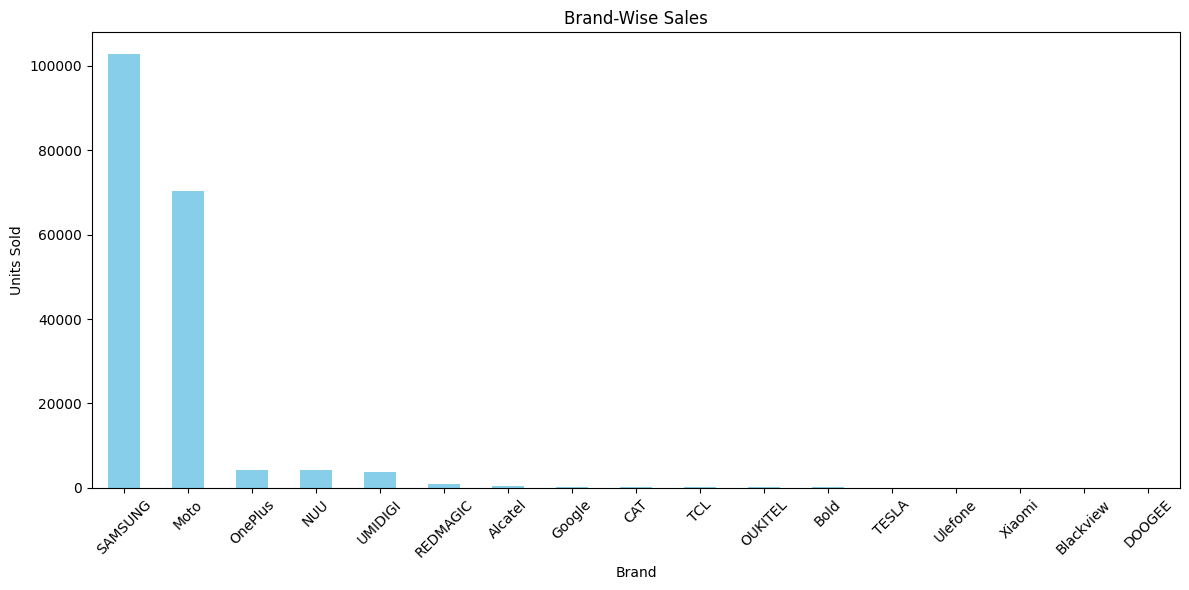

Month-wise sales:
 Month
December     46400.0
November    101500.0
October      40650.0
Name: Bought in Past Month, dtype: float64


C:\Users\Appa\AppData\Local\Temp\ipykernel_14524\2284132691.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_sales.index, y=month_sales.values, palette="viridis")


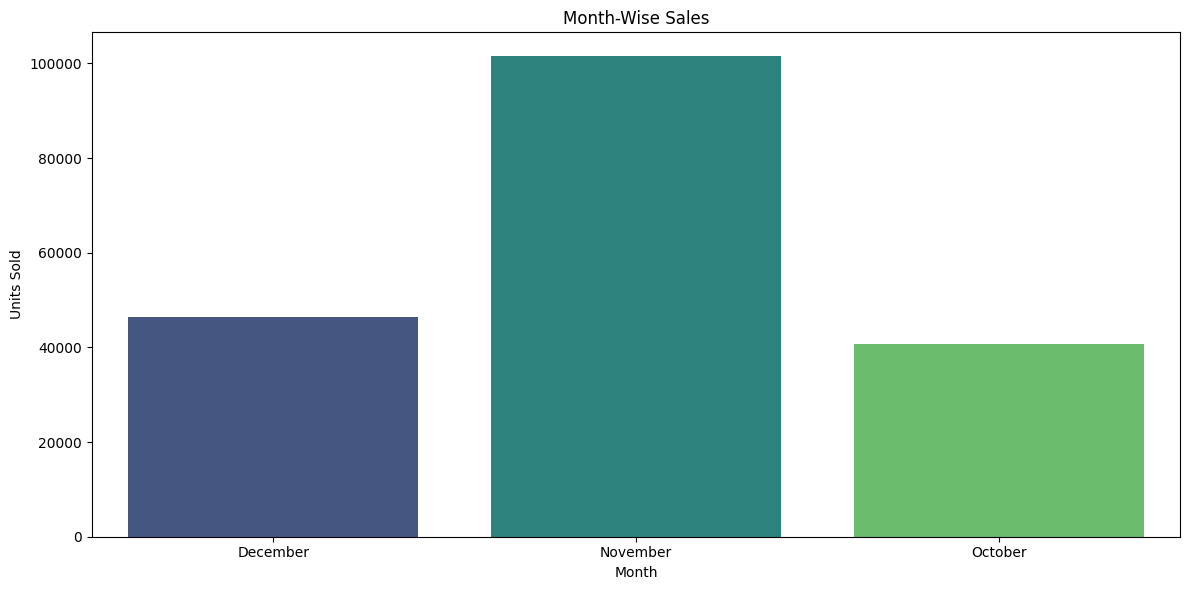

Average price by brand:
 Brand
Alcatel       53.000000
Bold          90.000000
NUU           94.545455
UMIDIGI       94.750000
Ulefone      100.000000
DOOGEE       110.000000
TCL          122.666667
Blackview    162.500000
CAT          169.000000
Moto         178.029412
OUKITEL      215.000000
Google       321.200000
OnePlus      370.000000
Xiaomi       549.000000
SAMSUNG      559.753846
TESLA        650.000000
REDMAGIC     749.000000
Name: Price in Dollar, dtype: float64


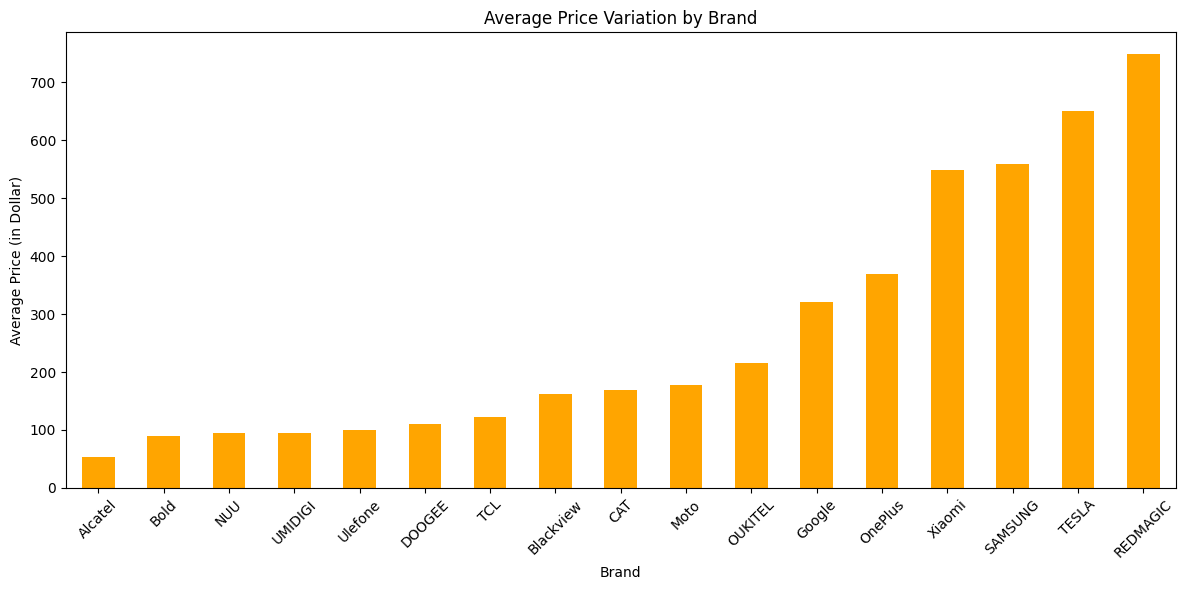

Correlation matrix:
                         Camera Megapixel in MP  Storage in GB  \
Camera Megapixel in MP                1.000000       0.334835   
Storage in GB                         0.334835       1.000000   
Price in Dollar                       0.225310       0.638761   
Rating                                0.063718       0.035751   
Bought in Past Month                  0.154681      -0.182559   

                        Price in Dollar    Rating  Bought in Past Month  
Camera Megapixel in MP         0.225310  0.063718              0.154681  
Storage in GB                  0.638761  0.035751             -0.182559  
Price in Dollar                1.000000  0.168450             -0.141957  
Rating                         0.168450  1.000000              0.258778  
Bought in Past Month          -0.141957  0.258778              1.000000  


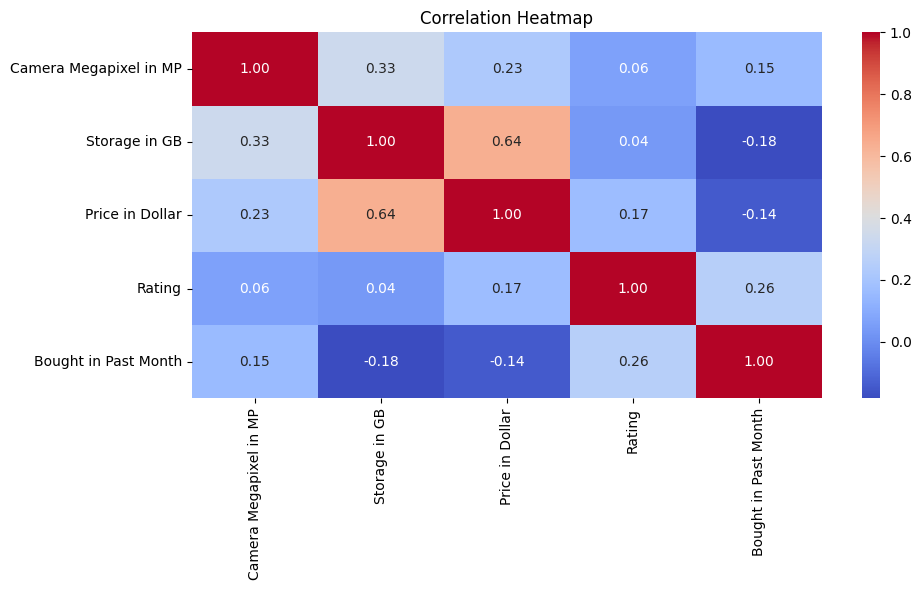

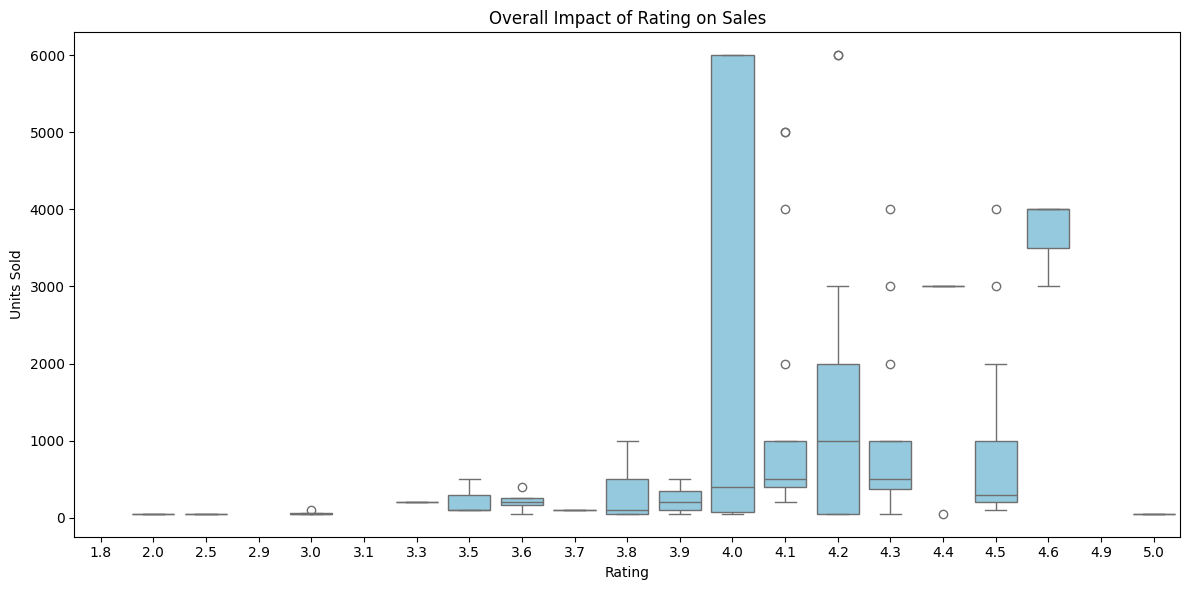

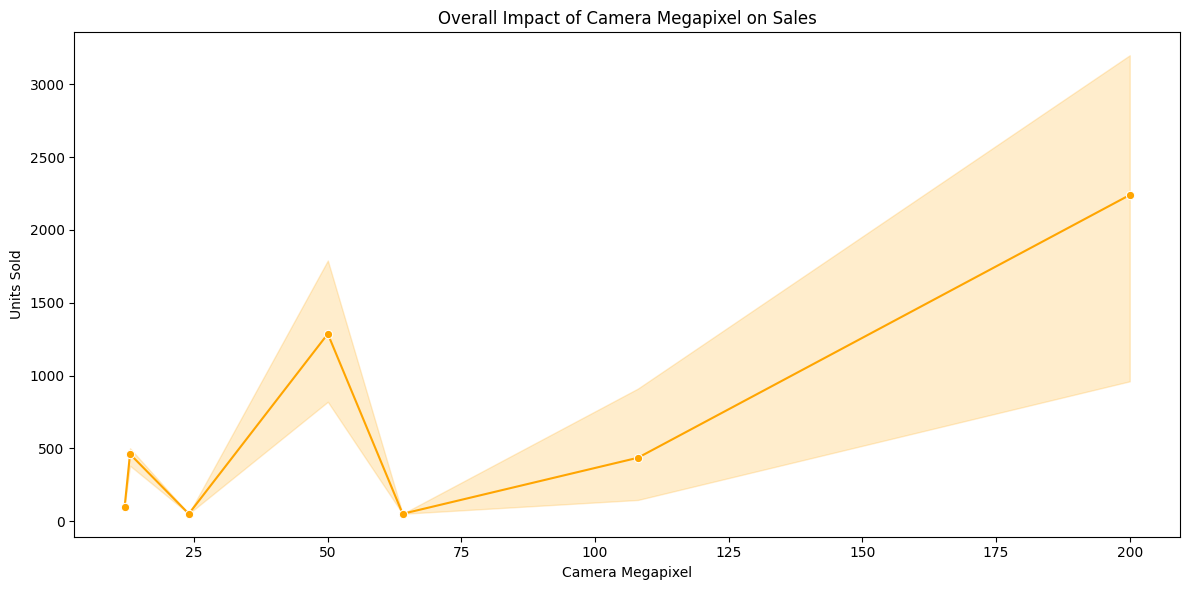

C:\Users\Appa\AppData\Local\Temp\ipykernel_14524\2284132691.py:87: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Storage in GB', y='Bought in Past Month', ci=None, color='green')


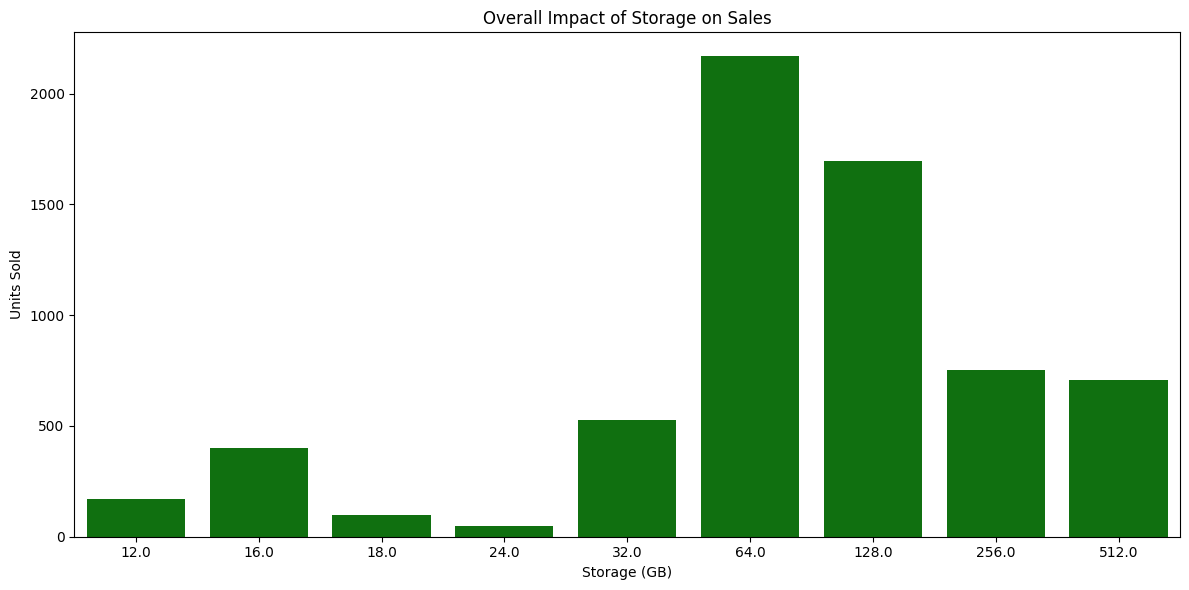

In [22]:
# Load the data
file_path = 'mobile_phone_data_with_brands.xlsx'
data = pd.read_excel(file_path)

# Ensure datetime format for Date
data['Date'] = pd.to_datetime(data['Date'])

# Extract month for analysis
data['Month'] = data['Date'].dt.month_name()

# Convert necessary columns to numeric
numeric_columns = ['Camera Megapixel in MP', 'Storage in GB', 'Price in Dollar', 'Rating', 'Number of Reviews', 'Bought in Past Month']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

### Brand-Wise Analysis ###
brand_sales = data.groupby('Brand')['Bought in Past Month'].sum().sort_values(ascending=False)
print("Brand-wise sales:\n", brand_sales)

# Plot brand-wise sales
plt.figure(figsize=(12, 6))
brand_sales.plot(kind='bar', color='skyblue')
plt.title("Brand-Wise Sales")
plt.ylabel("Units Sold")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Month-Wise Sales ###
month_sales = data.groupby('Month')['Bought in Past Month'].sum()
print("Month-wise sales:\n", month_sales)

# Plot month-wise sales
plt.figure(figsize=(12, 6))
sns.barplot(x=month_sales.index, y=month_sales.values, palette="viridis")
plt.title("Month-Wise Sales")
plt.ylabel("Units Sold")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

### Price Variations Brand-Wise ###
brand_price_variation = data.groupby('Brand')['Price in Dollar'].mean().sort_values()
print("Average price by brand:\n", brand_price_variation)

# Plot price variation
plt.figure(figsize=(12, 6))
brand_price_variation.plot(kind='bar', color='orange')
plt.title("Average Price Variation by Brand")
plt.ylabel("Average Price (in Dollar)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Feature Analysis ###
# Correlation between features and sales
correlation = data[['Camera Megapixel in MP', 'Storage in GB', 'Price in Dollar', 'Rating', 'Bought in Past Month']].corr()
print("Correlation matrix:\n", correlation)

# Heatmap of correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Rating', y='Bought in Past Month', color='skyblue')
plt.title("Overall Impact of Rating on Sales")
plt.ylabel("Units Sold")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

# Visualization for Overall Impact of Camera Megapixel on Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Camera Megapixel in MP', y='Bought in Past Month', marker='o', color='orange')
plt.title("Overall Impact of Camera Megapixel on Sales")
plt.ylabel("Units Sold")
plt.xlabel("Camera Megapixel")
plt.tight_layout()
plt.show()

# Visualization for Overall Impact of Storage on Sales
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Storage in GB', y='Bought in Past Month', ci=None, color='green')
plt.title("Overall Impact of Storage on Sales")
plt.ylabel("Units Sold")
plt.xlabel("Storage (GB)")
plt.tight_layout()
plt.show()

### Brand-Wise Contribution to Sales by Month  
This code calculates and visualizes the monthly sales contributions of each mobile phone brand as a percentage of total sales, grouped by month.

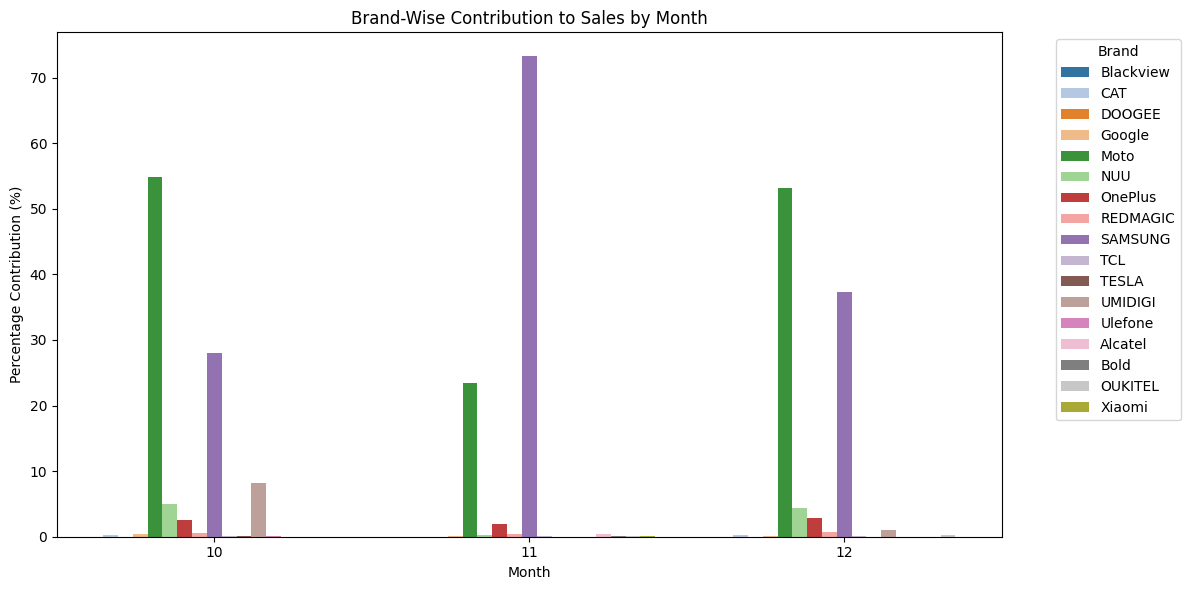

In [24]:
# Load the data
file_path = 'mobile_phone_data_with_brands.xlsx'
data = pd.read_excel(file_path)

# Ensure numeric columns are formatted correctly
numeric_columns = ['Camera Megapixel in MP', 'Storage in GB', 'Price in Dollar', 'Rating', 'Number of Reviews', 'Bought in Past Month']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert the 'Date' column to datetime and extract the month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

# Group by Month and Brand and calculate total sales
monthly_brand_sales = data.groupby(['Month', 'Brand'])['Bought in Past Month'].sum().reset_index()

# Calculate percentage contribution for each brand within each month
monthly_sales_total = monthly_brand_sales.groupby('Month')['Bought in Past Month'].transform('sum')
monthly_brand_sales['Percentage Contribution'] = (monthly_brand_sales['Bought in Past Month'] / monthly_sales_total) * 100

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_brand_sales, 
    x='Month', 
    y='Percentage Contribution', 
    hue='Brand', 
    palette='tab20'
)
plt.title("Brand-Wise Contribution to Sales by Month")
plt.ylabel("Percentage Contribution (%)")
plt.xlabel("Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Brand")
plt.tight_layout()
plt.show()


### Price Variation Over Months for Top 5 Brands  
This code identifies the top 5 brands based on total sales, calculates their monthly average prices, and visualizes how these prices change over time.

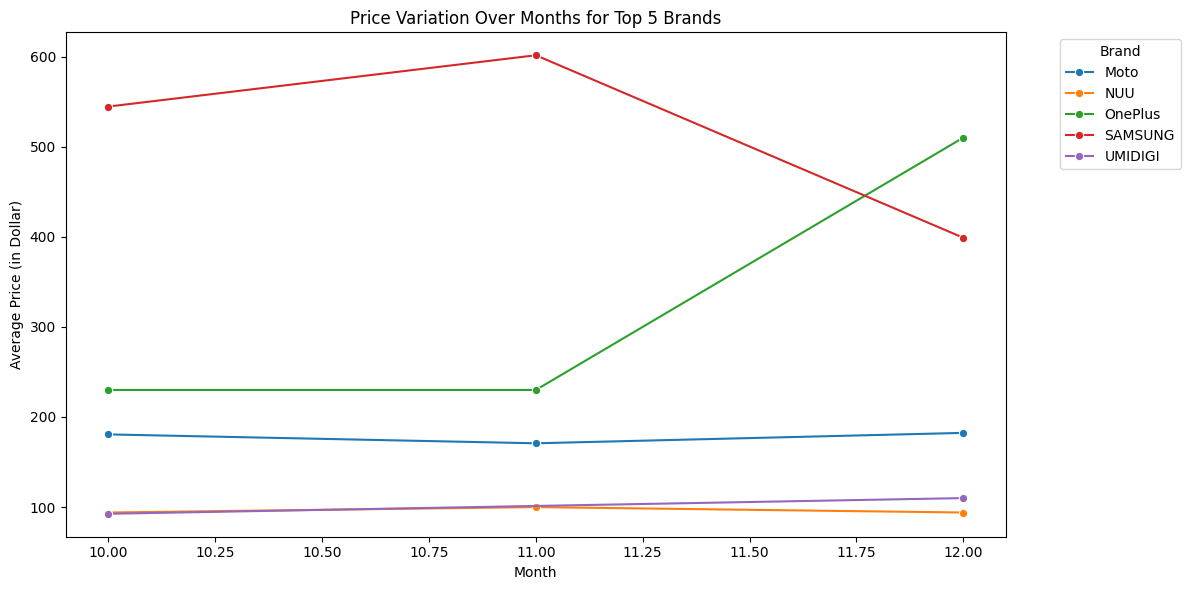

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'mobile_phone_data_with_brands.xlsx'
data = pd.read_excel(file_path)

# Ensure numeric columns are formatted correctly
numeric_columns = ['Camera Megapixel in MP', 'Storage in GB', 'Price in Dollar', 'Rating', 'Number of Reviews', 'Bought in Past Month']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert the 'Date' column to datetime and extract the month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

# Group by Brand and calculate total sales to identify the top 5 brands with highest sales
brand_sales = data.groupby('Brand')['Bought in Past Month'].sum().reset_index()
top_brands = brand_sales.nlargest(5, 'Bought in Past Month')['Brand'].values

# Filter the data to include only the top 5 brands
filtered_data = data[data['Brand'].isin(top_brands)]

# Group by Month and Brand and calculate the average price for each
monthly_brand_prices = filtered_data.groupby(['Month', 'Brand'])['Price in Dollar'].mean().reset_index()

# Visualize the data for price variation
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_brand_prices, x='Month', y='Price in Dollar', hue='Brand', marker='o', palette='tab10')
plt.title("Price Variation Over Months for Top 5 Brands")
plt.ylabel("Average Price (in Dollar)")
plt.xlabel("Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Brand")
plt.tight_layout()
plt.show()


### Top Colors by Sales for Each Brand  
This code determines the best-selling color for each brand by grouping data by brand and color, summing the sales for each combination, and identifying the top color by sales for each brand. It also provides a complete sorted list of all color sales for all brands.

In [ ]:
import pandas as pd

# Load the data
file_path = 'mobile_phone_data_with_brands.xlsx'
data = pd.read_excel(file_path)

# Ensure 'Bought in Past Month' is a numeric column
data['Bought in Past Month'] = pd.to_numeric(data['Bought in Past Month'], errors='coerce')

# Group by both 'Brand' and 'Color' and sum the sales ('Bought in Past Month')
color_sales_all_brands = data.groupby(['Brand', 'Color'])['Bought in Past Month'].sum().reset_index()

# Sort by 'Bought in Past Month' to get the top-selling color for each brand
color_sales_all_brands_sorted = color_sales_all_brands.sort_values(by='Bought in Past Month', ascending=False)

# Display the top color by sales for each brand
top_colors_by_sales = color_sales_all_brands_sorted.groupby('Brand').head(1)

# Display the result
print("Top Colors by Sales for Each Brand:")
print(top_colors_by_sales)

# If you'd like to see the full sorted list (all brands and their colors)
print("\nAll Colors Sorted by Sales for All Brands:")
print(color_sales_all_brands_sorted)


**Sales and Price Analysis by Color and SIM Type**  
This analysis explores total sales and price variations based on color and SIM type across mobile phone brands.

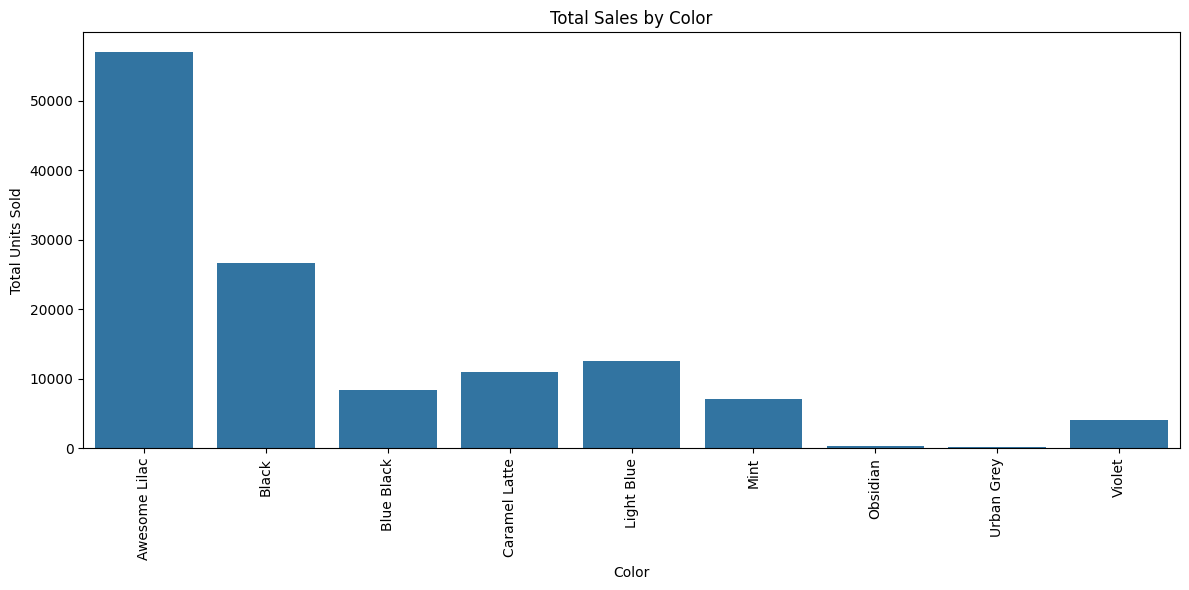

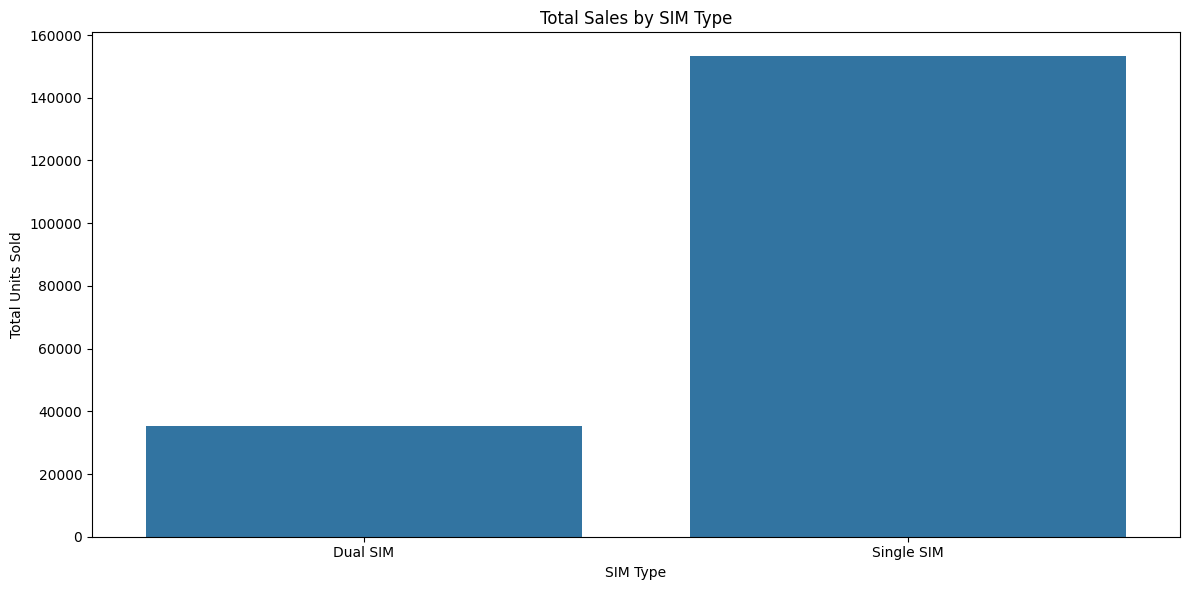

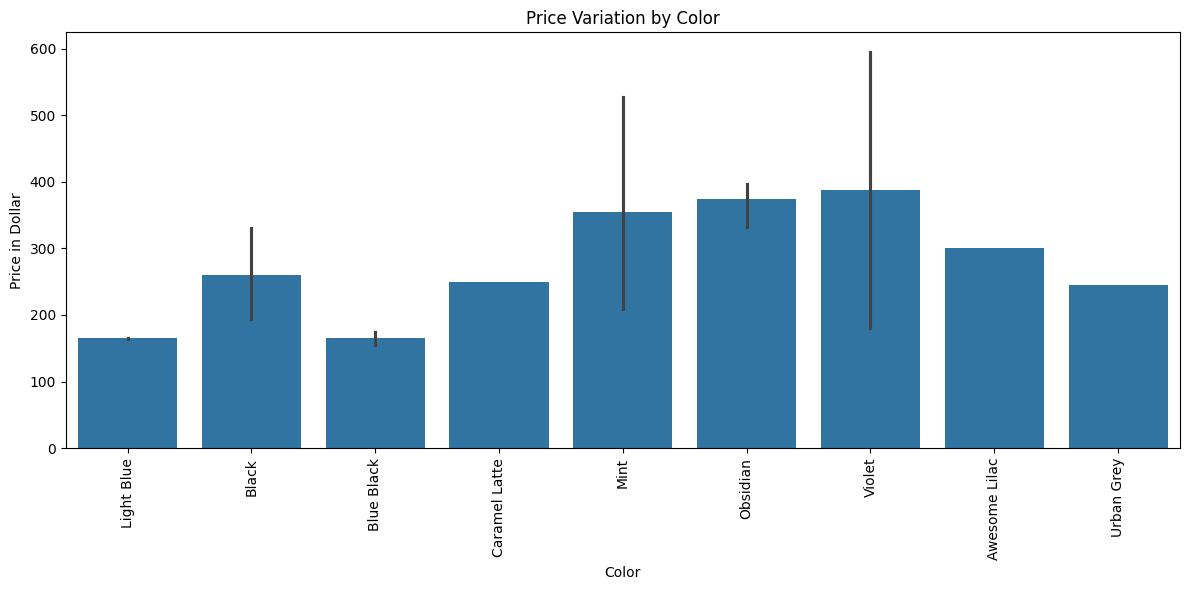

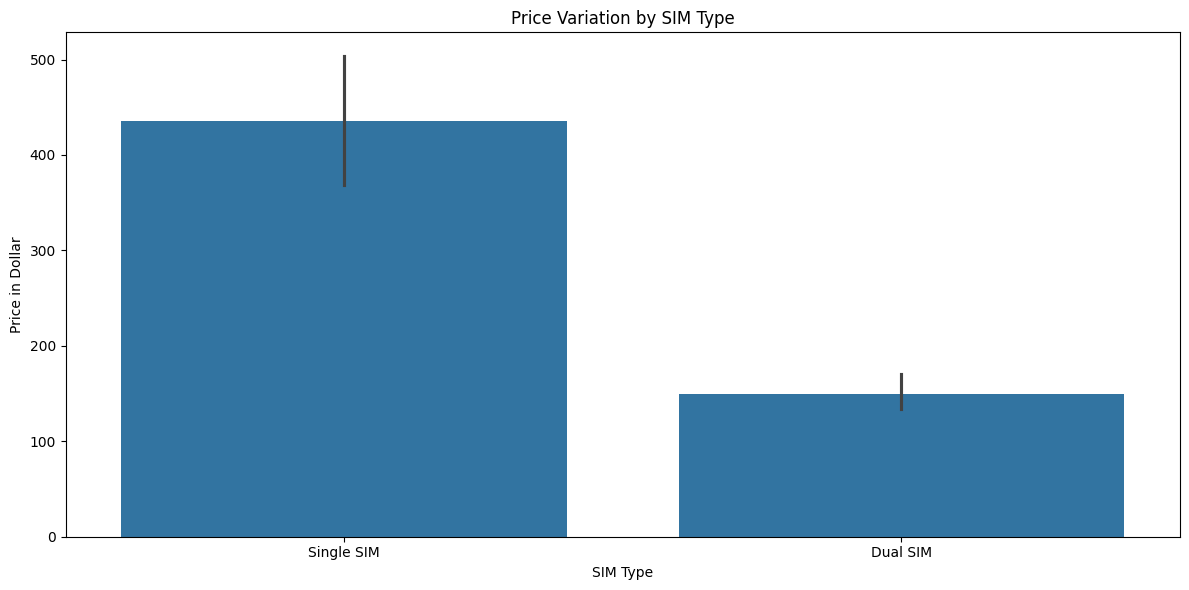

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = 'mobile_phone_data_with_brands.xlsx'
data = pd.read_excel(file_path)

# Ensure numeric columns are correctly formatted
data['Bought in Past Month'] = pd.to_numeric(data['Bought in Past Month'], errors='coerce')
data['Price in Dollar'] = pd.to_numeric(data['Price in Dollar'], errors='coerce')

# 1. Sales by Color - Bar Chart (Total Sales per Color)
sales_by_color = data.groupby('Color')['Bought in Past Month'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Color', y='Bought in Past Month', data=sales_by_color)
plt.title("Total Sales by Color")
plt.xlabel("Color")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Sales by SIM Type - Bar Chart (Total Sales per SIM Type)
sales_by_sim = data.groupby('Sim Type')['Bought in Past Month'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sim Type', y='Bought in Past Month', data=sales_by_sim)
plt.title("Total Sales by SIM Type")
plt.xlabel("SIM Type")
plt.ylabel("Total Units Sold")
plt.tight_layout()
plt.show()

# 3. Price Variation by Color - Violin Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Color', y='Price in Dollar', data=data)
plt.title("Price Variation by Color")
plt.xlabel("Color")
plt.ylabel("Price in Dollar")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Price Variation by SIM Type - Violin Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sim Type', y='Price in Dollar', data=data)
plt.title("Price Variation by SIM Type")
plt.xlabel("SIM Type")
plt.ylabel("Price in Dollar")
plt.tight_layout()
plt.show()


## Sales Forecasting Model

### Predicting Mobile Phone Metrics: Price, Rating, and Sales
This code leverages RandomForestRegressor to predict mobile phone prices, ratings, and monthly sales based on various features, and evaluates the model performance using R-squared and Mean Squared Error (MSE).

No missing values in target variables.
No missing values in X.
Price - Mean Squared Error: 17050.421141139905
Price - R-squared: 0.8605698350143408
Rating - Mean Squared Error: 0.001518461538461529
Rating - R-squared: 0.9942778355879293
Bought - Mean Squared Error: 5787.820512820513
Bought - R-squared: 0.9969197293169416


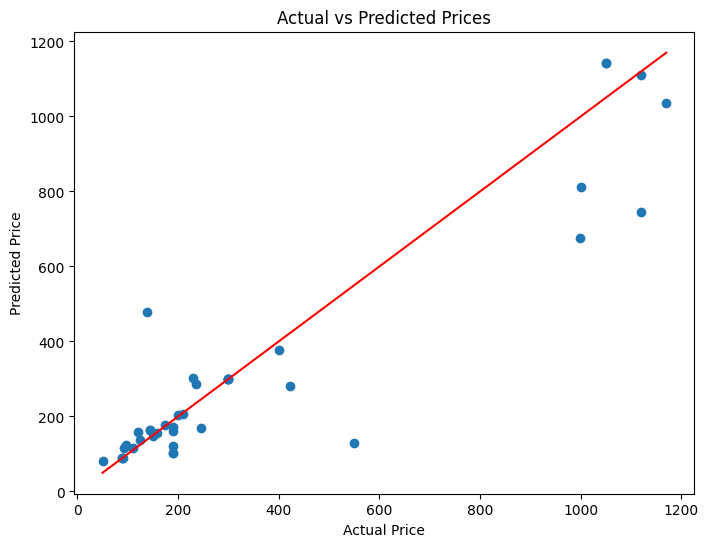

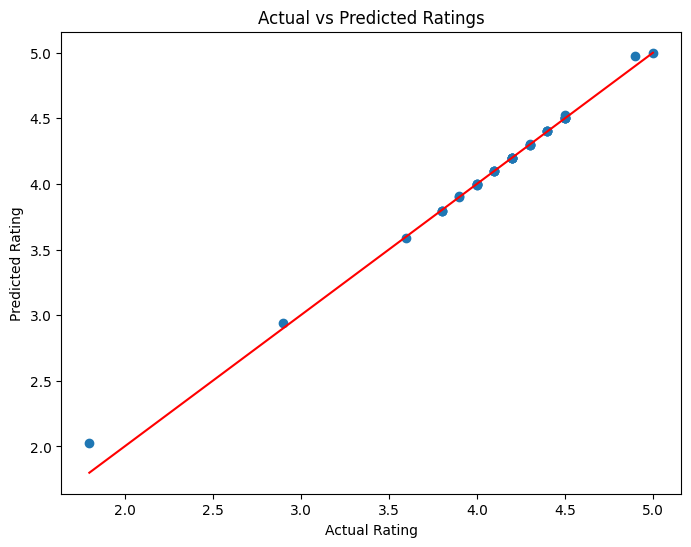

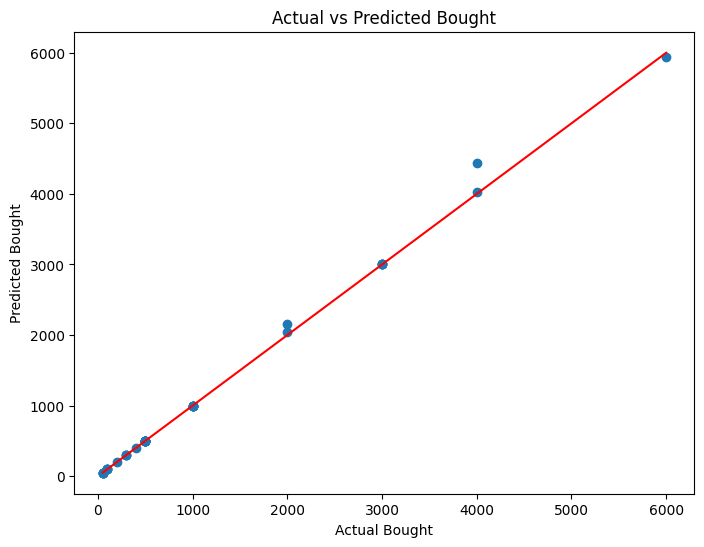

In [32]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Using RandomForestRegressor for better performance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # For scaling features

# Load the cleaned dataframe (ensure this is the correct dataframe)
merged_df_cleaned = pd.read_excel('mobile_phone_data_for_three_months.xlsx')

# Feature Engineering (Example: Create a combined feature)
def combine_features(row):
    storage_gb = int(re.search(r"(\d+)", row["Storage in GB"]).group(1)) if isinstance(row["Storage in GB"], str) and re.search(r"\d+", row["Storage in GB"]) else 0
    camera_mp = int(re.search(r"(\d+)", row["Camera Megapixel in MP"]).group(1)) if isinstance(row["Camera Megapixel in MP"], str) and re.search(r"\d+", row["Camera Megapixel in MP"]) else 0
    return storage_gb * camera_mp

# Add combined feature to the dataframe
merged_df_cleaned["Combined_Features"] = merged_df_cleaned.apply(combine_features, axis=1)

# Define feature columns and target variables
features = ["Rating", "Number of Reviews", "Bought in Past Month", "Combined_Features"]
target_price = "Price in Dollar"
target_rating = "Rating"
target_bought = "Bought in Past Month"

# Handle missing values (replace with median for robustness)
for col in features:
    if merged_df_cleaned[col].isnull().any():
        merged_df_cleaned[col] = merged_df_cleaned[col].fillna(merged_df_cleaned[col].median())

# Separate target variables
# Fill missing values in target variables (Price, Rating, Bought) with the median
y_price = merged_df_cleaned[target_price].fillna(merged_df_cleaned[target_price].median())
y_rating = merged_df_cleaned[target_rating].fillna(merged_df_cleaned[target_rating].median())
y_bought = merged_df_cleaned[target_bought].fillna(merged_df_cleaned[target_bought].median())

# Ensure there are no missing values in target variables
if y_price.isnull().any() or y_rating.isnull().any() or y_bought.isnull().any():
    print("There are still missing values in the target variables.")
else:
    print("No missing values in target variables.")

# Select features and ensure X is a 2D array
X = merged_df_cleaned[features]

# Ensure that there are no missing or NaN values in X
if X.isnull().any().any():
    print("Missing values detected in X.")
else:
    print("No missing values in X.")

# Scaling the features (important for some models, including tree-based ones)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train_price, y_test_price, y_train_rating, y_test_rating, y_train_bought, y_test_bought = train_test_split(
    X_scaled, y_price, y_rating, y_bought, test_size=0.2, random_state=42)

# Initialize and train a RandomForestRegressor for price prediction
model_price = RandomForestRegressor(n_estimators=100, random_state=42)
model_price.fit(X_train, y_train_price)

# Predict price
y_pred_price = model_price.predict(X_test)

# Evaluate price prediction
mse_price = mean_squared_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)
print(f"Price - Mean Squared Error: {mse_price}")
print(f"Price - R-squared: {r2_price}")

# Initialize and train RandomForestRegressor for rating prediction
model_rating = RandomForestRegressor(n_estimators=100, random_state=42)
model_rating.fit(X_train, y_train_rating)

# Predict rating
y_pred_rating = model_rating.predict(X_test)

# Evaluate rating prediction
mse_rating = mean_squared_error(y_test_rating, y_pred_rating)
r2_rating = r2_score(y_test_rating, y_pred_rating)
print(f"Rating - Mean Squared Error: {mse_rating}")
print(f"Rating - R-squared: {r2_rating}")

# Initialize and train RandomForestRegressor for bought prediction
model_bought = RandomForestRegressor(n_estimators=100, random_state=42)
model_bought.fit(X_train, y_train_bought)

# Predict bought
y_pred_bought = model_bought.predict(X_test)

# Evaluate bought prediction
mse_bought = mean_squared_error(y_test_bought, y_pred_bought)
r2_bought = r2_score(y_test_bought, y_pred_bought)
print(f"Bought - Mean Squared Error: {mse_bought}")
print(f"Bought - R-squared: {r2_bought}")

# Visualize predictions vs actual values for price
plt.figure(figsize=(8, 6))
plt.scatter(y_test_price, y_pred_price)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test_price), max(y_test_price)], [min(y_test_price), max(y_test_price)], color='red')  # Add diagonal line
plt.show()

# Visualize predictions vs actual values for rating
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rating, y_pred_rating)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.plot([min(y_test_rating), max(y_test_rating)], [min(y_test_rating), max(y_test_rating)], color='red')  # Add diagonal line
plt.show()

# Visualize predictions vs actual values for bought
plt.figure(figsize=(8, 6))
plt.scatter(y_test_bought, y_pred_bought)
plt.xlabel("Actual Bought")
plt.ylabel("Predicted Bought")
plt.title("Actual vs Predicted Bought")
plt.plot([min(y_test_bought), max(y_test_bought)], [min(y_test_bought), max(y_test_bought)], color='red')  # Add diagonal line
plt.show()



### Prediction of Next Month's Mobile Phone Data 
This code performs feature engineering, handles missing values, and scales the data. It uses RandomForestRegressor models to predict price, rating, and sales for each unique product, and saves the predictions into an Excel file for the next month.

In [31]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataframe
merged_df_cleaned = pd.read_excel('mobile_phone_data_for_three_months.xlsx')

# Feature Engineering: Combine storage and camera megapixel
def combine_features(row):
    storage_gb = int(re.search(r"(\d+)", row["Storage in GB"]).group(1)) if isinstance(row["Storage in GB"], str) and re.search(r"\d+", row["Storage in GB"]) else 0
    camera_mp = int(re.search(r"(\d+)", row["Camera Megapixel in MP"]).group(1)) if isinstance(row["Camera Megapixel in MP"], str) and re.search(r"\d+", row["Camera Megapixel in MP"]) else 0
    return storage_gb * camera_mp

# Add combined feature
merged_df_cleaned["Combined_Features"] = merged_df_cleaned.apply(combine_features, axis=1)

# Define feature columns and target variables
features = ["Rating", "Number of Reviews", "Bought in Past Month", "Combined_Features"]
target_price = "Price in Dollar"
target_rating = "Rating"
target_bought = "Bought in Past Month"

# Handle missing values
for col in features:
    if merged_df_cleaned[col].isnull().any():
        merged_df_cleaned[col] = merged_df_cleaned[col].fillna(merged_df_cleaned[col].median())

# Fill missing values in target variables
y_price = merged_df_cleaned[target_price].fillna(merged_df_cleaned[target_price].median())
y_rating = merged_df_cleaned[target_rating].fillna(merged_df_cleaned[target_rating].median())
y_bought = merged_df_cleaned[target_bought].fillna(merged_df_cleaned[target_bought].median())

# Select features
X = merged_df_cleaned[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train_price, y_test_price, y_train_rating, y_test_rating, y_train_bought, y_test_bought = train_test_split(
    X_scaled, y_price, y_rating, y_bought, test_size=0.2, random_state=42)

# Train models
model_price = RandomForestRegressor(n_estimators=100, random_state=42)
model_price.fit(X_train, y_train_price)

model_rating = RandomForestRegressor(n_estimators=100, random_state=42)
model_rating.fit(X_train, y_train_rating)

model_bought = RandomForestRegressor(n_estimators=100, random_state=42)
model_bought.fit(X_train, y_train_bought)

# Prepare DataFrame for predictions
unique_products = merged_df_cleaned.drop_duplicates(subset="Product Name")

# Predict values
unique_products = unique_products.copy()  # Avoid SettingWithCopyWarning
unique_products.loc[:, "Predicted Price in Dollar"] = model_price.predict(scaler.transform(unique_products[features]))
unique_products.loc[:, "Predicted Rating"] = model_rating.predict(scaler.transform(unique_products[features]))
unique_products.loc[:, "Predicted Bought in Past Month"] = model_bought.predict(scaler.transform(unique_products[features]))

unique_products.loc[:, "Date"] = pd.Timestamp("2025-01-01").strftime('%Y-%m-%d')

# Ensure all required columns are present
required_columns = [
    "Date", "Product Name", "Sim Type", "Color", 
    "Camera Megapixel in MP", "Storage in GB", "Charging Type", 
    "Predicted Price in Dollar", "Predicted Rating", "Number of Reviews", 
    "Predicted Bought in Past Month", "Brand"
]
# Check for missing columns
for col in required_columns:
    if col not in unique_products.columns:
        unique_products[col] = None  # Fill missing columns with None
valid_brands = [
    "Alcatel", "Blackview", "Bold", "CAT", "DOOGEE", "Google", "Moto", 
    "Motorola", "NUU", "OUKITEL", "OnePlus", "REDMAGIC", "SAMSUNG", 
    "Samsung", "TCL", "TESLA", "Tracfone", "UMIDIGI", "Ulefone", "Xiaomi"
]

# Add a 'Brand' column by identifying the valid brand name in the 'Product Name'
def identify_brand(product_name, valid_brands):
    if pd.isna(product_name):
        return None
    for brand in valid_brands:
        if brand.lower() in product_name.lower():
            return brand
    return None

unique_products['Brand'] = unique_products['Product Name'].apply(lambda x: identify_brand(x, valid_brands))

# Save the updated DataFrame back to the Excel file
output_file_path = 'predicted_values_next_month.xlsx'
unique_products.to_excel(output_file_path, index=False)

# Reorder and save the final data
final_data = unique_products[required_columns]
final_data.to_excel("predicted_values_next_month.xlsx", index=False)

print("Predicted values have been saved to 'predicted_values_next_month.xlsx'")


Predicted values have been saved to 'predicted_values_next_month.xlsx'


In [33]:
# Load the data
file_path = 'predicted_values_next_month.xlsx'
data = pd.read_excel(file_path)
data


,Date,Product Name,Sim Type,Color,Camera Megapixel in MP,Storage in GB,Charging Type,Predicted Price in Dollar,Predicted Rating,Number of Reviews,Predicted Bought in Past Month,Brand
0,2025-01-01,Moto G 5G | 2024 | Unlocked | Made for US 4/12...,Single SIM,NaN,50.0,128.0,Standard Charging,152.25000,4.100,1,4940,Moto
1,2025-01-01,Samsung Galaxy A15 (SM-155M/DSN),Dual SIM,Light Blue,NaN,128.0,Standard Charging,160.90000,4.200,1,5830,SAMSUNG
2,2025-01-01,S24 Ultra Unlocked Phone 8GB+256GB Android Cel...,Dual SIM,Black,108.0,256.0,Standard Charging,168.89000,5.000,9,500,NaN
3,2025-01-01,Moto G Play | 2024 | Unlocked | Made for US 4/...,Single SIM,NaN,50.0,64.0,Standard Charging,116.45000,4.001,1,5940,Moto
4,2025-01-01,SAMSUNG Galaxy A15 5G A Series Cell Phone,Single SIM,Blue Black,NaN,128.0,Super Fast Charging,182.53000,4.100,1,1000,SAMSUNG
...,...,...,...,...,...,...,...,...,...,...,...,...
80,2025-01-01,C24 Ultra 5G Smartphone 6+256GB Unlocked Phone,Single SIM,Black,108.0,256.0,Standard Charging,121.32000,3.997,9,500,NaN
81,2025-01-01,OnePlus 12,Dual SIM,Black,NaN,12.0,Standard Charging,683.65500,4.498,658,300,OnePlus
82,2025-01-01,I15 Ultra Smartphone Unlocked Cell Phones 5G P...,Dual SIM,Black,48.0,256.0,Standard Charging,165.88746,5.000,3,500,NaN
83,2025-01-01,Unlocked Phones S24 Ultra Smartphone with Buil...,Dual SIM,Violet,108.0,256.0,Standard Charging,161.31000,2.027,9,500,NaN


This code performs an analysis and visualization on the predicted mobile phone data for the next month:

1. **Brand-Wise Sales Analysis**:  
   It calculates the total predicted sales for each brand and visualizes it as a bar chart, showing the units sold by each brand.

2. **Month-Wise Sales Analysis**:  
   It groups the sales by month to analyze trends in the predicted sales for each month.

3. **Brand-Wise Price Variation**:  
   It calculates and visualizes the average predicted price of mobile phones for each brand, highlighting price variations.

Brand-wise sales:
 Brand
SAMSUNG      24116
Moto         22210
Blackview     2000
OnePlus       1300
DOOGEE        1000
NUU            800
UMIDIGI        800
Xiaomi         550
Alcatel        396
REDMAGIC       200
Google         200
OUKITEL        150
CAT            100
Bold           100
TCL             50
TESLA           50
Ulefone         50
Name: Predicted Bought in Past Month, dtype: int64


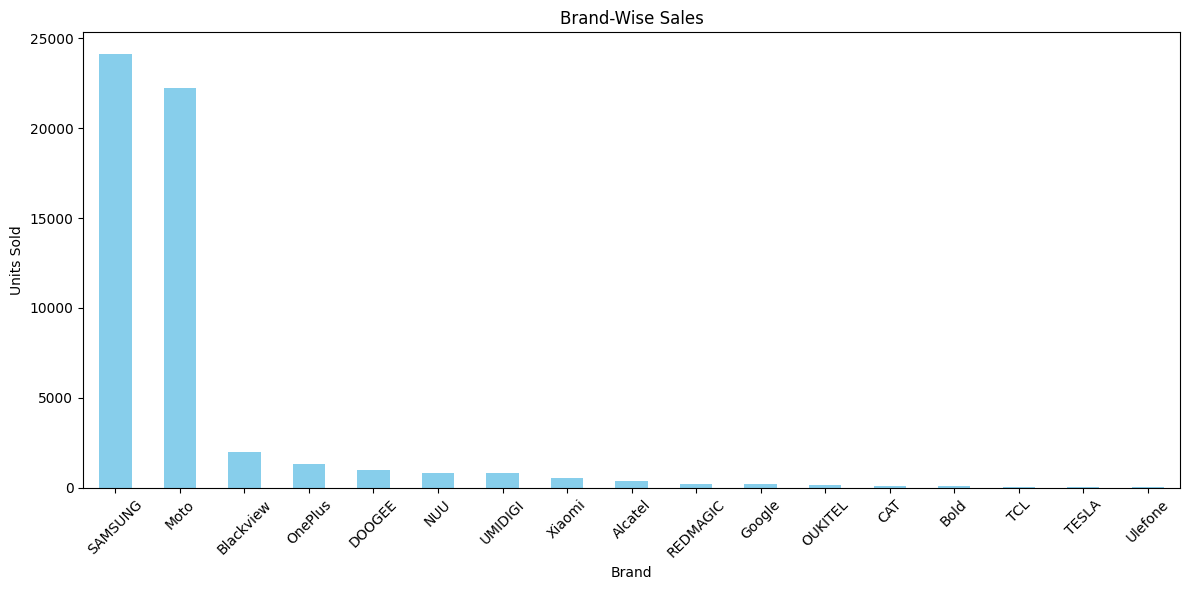

Month-wise sales:
 Month
January    64070
Name: Predicted Bought in Past Month, dtype: int64
Average price by brand:
 Brand
NUU          112.980000
TCL          122.902833
UMIDIGI      123.764762
Alcatel      124.513333
DOOGEE       156.435778
Bold         157.400000
Blackview    167.771865
Moto         191.719963
CAT          205.490000
Xiaomi       235.510000
Ulefone      286.240000
Google       303.183704
OUKITEL      397.010000
SAMSUNG      479.712980
OnePlus      492.543929
TESLA        506.900000
REDMAGIC     689.532667
Name: Predicted Price in Dollar, dtype: float64


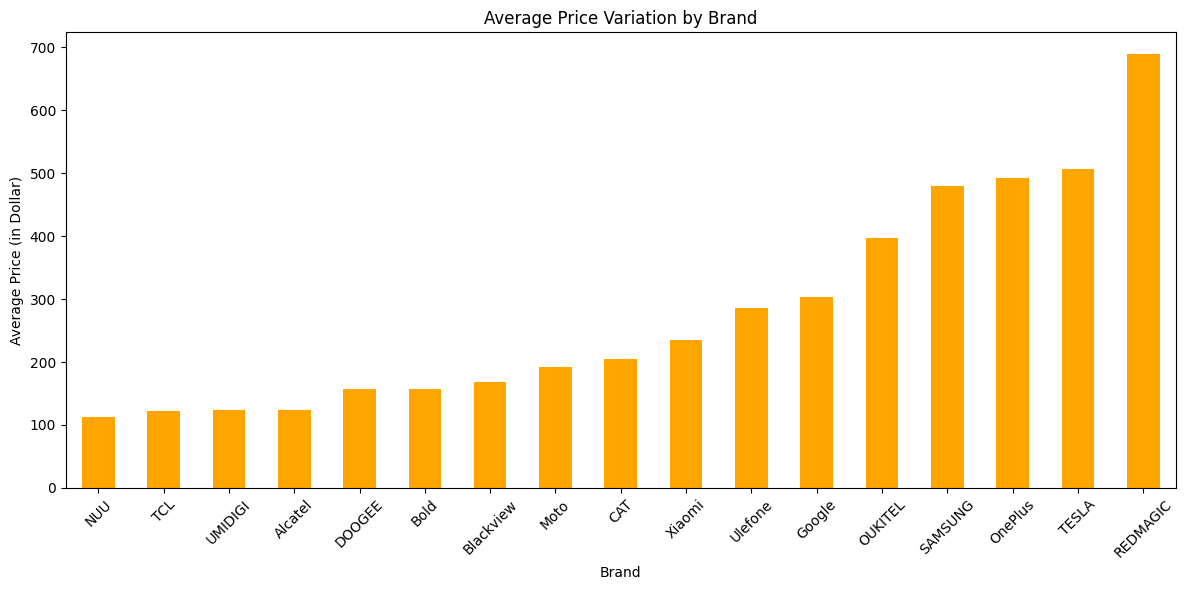

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'predicted_values_next_month.xlsx'
data = pd.read_excel(file_path)

# Ensure datetime format for Date
data['Date'] = pd.to_datetime(data['Date'])

# Extract month for analysis
data['Month'] = data['Date'].dt.month_name()

# Convert necessary columns to numeric
numeric_columns = ['Camera Megapixel in MP', 'Storage in GB', 'Predicted Price in Dollar', 'Predicted Rating', 'Number of Reviews', 'Predicted Bought in Past Month']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

### Brand-Wise Analysis ###
brand_sales = data.groupby('Brand')['Predicted Bought in Past Month'].sum().sort_values(ascending=False)
print("Brand-wise sales:\n", brand_sales)

# Plot brand-wise sales
plt.figure(figsize=(12, 6))
brand_sales.plot(kind='bar', color='skyblue')
plt.title("Brand-Wise Sales")
plt.ylabel("Units Sold")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Month-Wise Sales ###
month_sales = data.groupby('Month')['Predicted Bought in Past Month'].sum()
print("Month-wise sales:\n", month_sales)

brand_price_variation = data.groupby('Brand')['Predicted Price in Dollar'].mean().sort_values()
print("Average price by brand:\n", brand_price_variation)

# Plot price variation
plt.figure(figsize=(12, 6))
brand_price_variation.plot(kind='bar', color='orange')
plt.title("Average Price Variation by Brand")
plt.ylabel("Average Price (in Dollar)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Conclusion:**

This notebook follows the journey from collecting mobile phone data through web scraping to predicting future sales using machine learning. We performed data preprocessing, engineered features, and used RandomForestRegressor models to forecast price, rating, and sales figures for next month. The insights from brand-wise and month-wise sales, along with price variations, provide valuable information for market analysis and decision-making strategies.